In [2]:
from warnings import filterwarnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

filterwarnings('ignore')

In [3]:
train = pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test = pd.read_csv("test.csv")
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Test set doesn't have Survived column

In [5]:
df = pd.concat([train, test], sort = False, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
df['Fare'] = df['Fare'].fillna(value=df['Fare'].median())

In [8]:
df["Fare"][df['Fare']>100] = 100

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [10]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
df['Embarked'] = df['Embarked'].fillna('S')

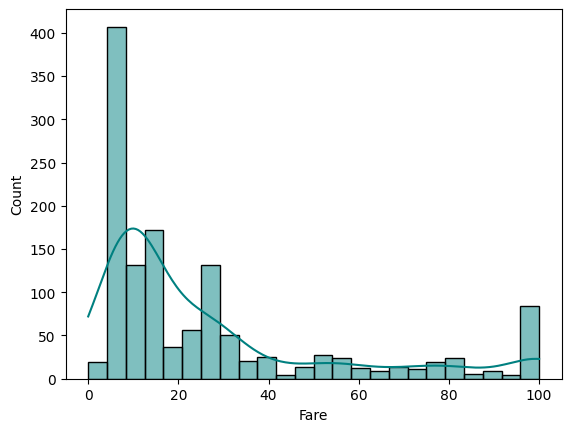

In [12]:
sns.histplot(data=df["Fare"], kde=True, color="teal")
plt.show()

In [13]:
import plotly.express as px

fig = px.bar(df.groupby(['Pclass', 'Age', 'Embarked'],as_index=False).size(), x='Pclass', y="Age", facet_col="Embarked", barmode='relative')
fig.show()

<Axes: >

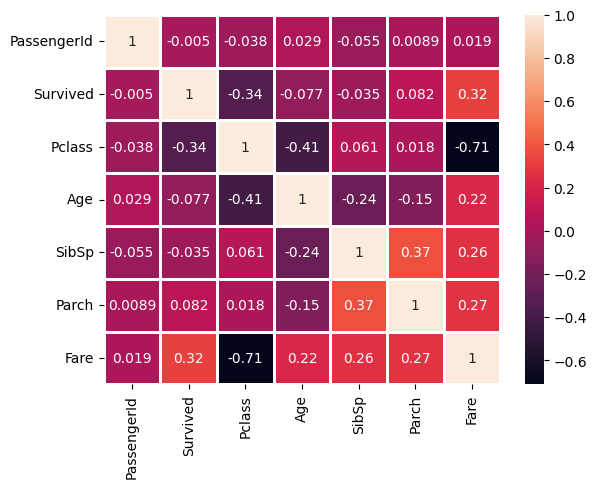

In [14]:
sns.heatmap(df.corr(),annot=True, linewidths=2)

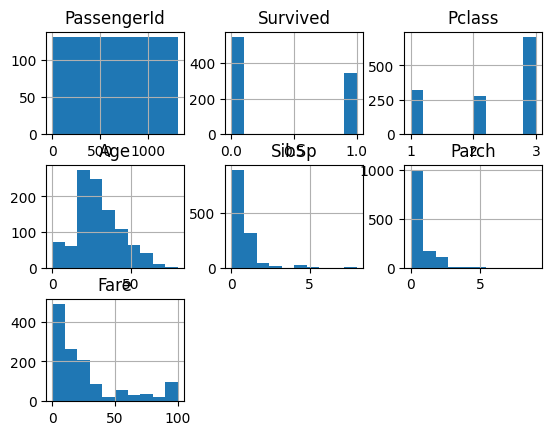

In [15]:
df.hist();

In [16]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [17]:
indexs = list(np.where(df["Age"].isnull())[0])

for i in indexs:
   if df["Pclass"][i] == 1:
       df["Age"][i]=np.mean(df.where(df["Pclass"]==1))["Age"]
   elif df["Pclass"][i] == 2:
       df["Age"][i]=np.mean(df.where(df["Pclass"]==2))["Age"]
   elif df["Pclass"][i] == 3:
       df["Age"][i]=np.mean(df.where(df["Pclass"]==3))["Age"]

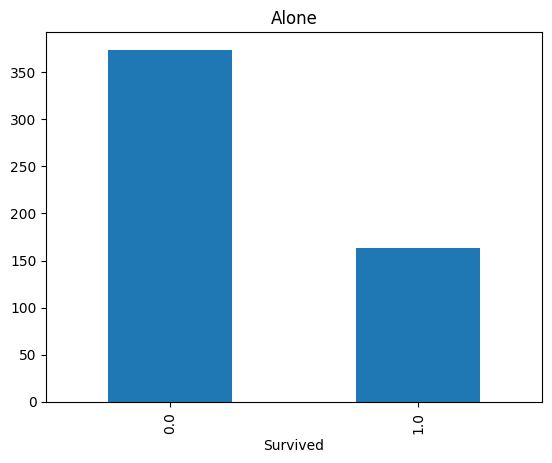

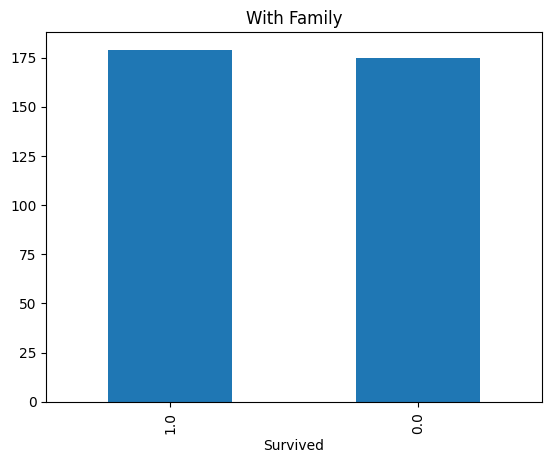

In [18]:
# Feature Engineering
df['IsAlone']=df['SibSp'] + df['Parch']
df['IsAlone']=df['IsAlone'].apply(lambda x: 0 if x >0 else 1)

df.groupby('IsAlone')['Survived'].value_counts()[1].plot(kind='bar')
plt.title('Alone')
plt.show()
df.groupby('IsAlone')['Survived'].value_counts()[0].plot(kind='bar')
plt.title('With Family');

In [19]:
#Age
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

In [20]:
df["Title"] = df["Name"].str.extract("([A-Za-z]+)\.",expand=False)
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [21]:
df['Title'] = df['Title'].replace(['Capt', 'Dr', 'Major', 'Rev'], 'Officer')
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Don', 'Sir', 'Jonkheer', 'Dona'], 'Royal')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Officer     19
Royal        6
Col          4
Name: Title, dtype: int64

In [22]:
#Cabin
df['Cabin'] = df['Cabin'].fillna('Missing')
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [23]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [24]:
df = df.drop(["Name", "Ticket"], axis = 1)

In [25]:
df["IsAlone"] = df["IsAlone"].astype("category")

In [26]:
all_dummies = pd.get_dummies(df)
all_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Age            1309 non-null   float64
 4   SibSp          1309 non-null   int64  
 5   Parch          1309 non-null   int64  
 6   Fare           1309 non-null   float64
 7   Family_Size    1309 non-null   int64  
 8   Sex_female     1309 non-null   uint8  
 9   Sex_male       1309 non-null   uint8  
 10  Cabin_A        1309 non-null   uint8  
 11  Cabin_B        1309 non-null   uint8  
 12  Cabin_C        1309 non-null   uint8  
 13  Cabin_D        1309 non-null   uint8  
 14  Cabin_E        1309 non-null   uint8  
 15  Cabin_F        1309 non-null   uint8  
 16  Cabin_G        1309 non-null   uint8  
 17  Cabin_M        1309 non-null   uint8  
 18  Cabin_T 

In [27]:
cols_to_standardize = ['Pclass', 'Family_Size', 'Fare']

scaler = StandardScaler()

scaler.fit(all_dummies[cols_to_standardize])

all_dummies[cols_to_standardize] = scaler.transform(all_dummies[cols_to_standardize])

all_dummies

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,...,Embarked_S,IsAlone_0,IsAlone_1,Title_Col,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,1,0.0,0.841916,1.0,1,0,-0.725770,0.073352,0,1,...,1,1,0,0,0,0,1,0,0,0
1,2,1.0,-1.546098,2.0,1,0,1.595538,0.073352,1,0,...,0,1,0,0,0,0,0,1,0,0
2,3,1.0,0.841916,1.0,0,0,-0.701300,-0.558346,1,0,...,1,0,1,0,0,1,0,0,0,0
3,4,1.0,-1.546098,2.0,1,0,0.936365,0.073352,1,0,...,1,1,0,0,0,0,0,1,0,0
4,5,0.0,0.841916,2.0,0,0,-0.696768,-0.558346,0,1,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,0.841916,1.0,0,0,-0.696768,-0.558346,0,1,...,1,0,1,0,0,0,1,0,0,0
1305,1306,NaN,-1.546098,2.0,0,0,2.636564,-0.558346,1,0,...,0,0,1,0,0,0,0,0,0,1
1306,1307,NaN,0.841916,2.0,0,0,-0.725770,-0.558346,0,1,...,1,0,1,0,0,0,1,0,0,0
1307,1308,NaN,0.841916,1.0,0,0,-0.696768,-0.558346,0,1,...,1,0,1,0,0,0,1,0,0,0


In [28]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    float64
 2   Pclass         891 non-null    float64
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Family_Size    891 non-null    float64
 8   Sex_female     891 non-null    uint8  
 9   Sex_male       891 non-null    uint8  
 10  Cabin_A        891 non-null    uint8  
 11  Cabin_B        891 non-null    uint8  
 12  Cabin_C        891 non-null    uint8  
 13  Cabin_D        891 non-null    uint8  
 14  Cabin_E        891 non-null    uint8  
 15  Cabin_F        891 non-null    uint8  
 16  Cabin_G        891 non-null    uint8  
 17  Cabin_M        891 non-null    uint8  
 18  Cabin_T   

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1),
                                                    all_train['Survived'], test_size=0.30,
                                                    random_state=101)

Build Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : (3,5,8,10)
              , 'max_depth' : (10,12,15,20)
              , 'min_samples_split' : (6,8,10,12)
             }
RF_grid  = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score= False), param_grid = parameters, cv = 10, verbose = True)
RF_grid_model = RF_grid.fit(X_train, y_train)
RF_grid_model.best_estimator_

Fitting 10 folds for each of 64 candidates, totalling 640 fits


RandomForestClassifier(max_depth=10, min_samples_split=12, n_estimators=10,
                       n_jobs=-1)

In [32]:
RF_Model = RandomForestClassifier(max_depth=15, max_samples=None,
                       min_samples_split=12, n_estimators=10, n_jobs=-1)

In [33]:
RF_Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=12, n_estimators=10,
                       n_jobs=-1)

In [34]:
predictions = RF_Model.predict(X_test)

In [35]:
print("Scores of RF Classifier")
print(f'Test : {RF_Model.score(X_test, y_test):.3f}')
print(f'Train : {RF_Model.score(X_train, y_train):.3f}')
print()

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}\n")

tn,fp,fn,tp = confusion_matrix(y_test,predictions).ravel()

print('Confusion Matrix:')
print(f'                 Predicted Positive   Predicted Negative')
print(f'Actual Positive        {tp:16} {fn:16}')
print(f'Actual Negative        {fp:16} {tn:16}')




Scores of RF Classifier
Test : 0.817
Train : 0.881

Accuracy:  0.817
Precision: 0.882
Recall:    0.658

Confusion Matrix:
                 Predicted Positive   Predicted Negative
Actual Positive                      75               39
Actual Negative                      10              144


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

In [37]:
print("Scores of KNN Classifier")
print(f'Test : {RF_Model.score(X_test, y_test):.3f}')
print(f'Train : {RF_Model.score(X_train, y_train):.3f}')
print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}\n")

tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

print('Confusion Matrix:')
print(f'                 Predicted Positive   Predicted Negative')
print(f'Actual Positive        {tp:16} {fn:16}')
print(f'Actual Negative        {fp:16} {tn:16}')




Scores of KNN Classifier
Test : 0.817
Train : 0.881

Accuracy:  0.813
Precision: 0.840
Recall:    0.693

Confusion Matrix:
                 Predicted Positive   Predicted Negative
Actual Positive                      79               35
Actual Negative                      15              139


In [38]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)

In [39]:
t_pred = RF_Model.predict(TestForPred).astype(int)

In [40]:
PassengerId = all_test['PassengerId']

In [41]:
RF_Sub = pd.DataFrame({'PassengerId': PassengerId, 'Survived': t_pred})
RF_Sub.head()

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,0


In [42]:
RF_Sub.to_csv("RF_Class_Submission.csv", index=False)

In [44]:
# Define the parameter grid
parameters = {
    'n_estimators': (3, 5, 8, 10),
    'max_depth': (10, 12, 15, 20),
    'min_samples_split': (6, 8, 10, 12)
}

# Perform grid search cross-validation
RF_grid = GridSearchCV(
    RandomForestClassifier(n_jobs=-1, oob_score=False),
    param_grid=parameters,
    cv=10
)
RF_grid_model = RF_grid.fit(X_train, y_train)

# Retrieve the best estimator from the grid search
RF_Model = RF_grid_model.best_estimator_

# Make predictions on the test set
predictions = RF_Model.predict(X_test)

# Print model evaluation scores
print("Scores of RF Classifier")
print(f'Test: {RF_Model.score(X_test, y_test):.3f}')
print(f'Train: {RF_Model.score(X_train, y_train):.3f}')
print()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}\n")

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print('Confusion Matrix:')
print(f'                 Predicted Positive   Predicted Negative')
print(f'Actual Positive        {tp:16} {fn:16}')
print(f'Actual Negative        {fp:16} {tn:16}')

Scores of RF Classifier
Test: 0.813
Train: 0.878

Accuracy:  0.813
Precision: 0.881
Recall:    0.649

Confusion Matrix:
                 Predicted Positive   Predicted Negative
Actual Positive                      74               40
Actual Negative                      10              144


In [45]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': (3, 5, 7, 9, 11),
    'weights': ('uniform', 'distance'),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')
}

# Create a KNN classifier instance
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Print scores of KNN classifier
print("Scores of KNN Classifier")
print(f'Test: {best_knn.score(X_test, y_test):.3f}')
print(f'Train: {best_knn.score(X_train, y_train):.3f}\n')

# Calculate and print accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}\n")

# Calculate and print confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('Confusion Matrix:')
print('                 Predicted Positive   Predicted Negative')
print(f'Actual Positive        {tp:16} {fn:16}')
print(f'Actual Negative        {fp:16} {tn:16}')

Scores of KNN Classifier
Test: 0.813
Train: 0.857

Accuracy:  0.813
Precision: 0.840
Recall:    0.693

Confusion Matrix:
                 Predicted Positive   Predicted Negative
Actual Positive                      79               35
Actual Negative                      15              139
